In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing sklearn libraries
from sklearn import metrics, preprocessing,model_selection
from sklearn import linear_model

In [2]:
# reading data
df = pd.read_csv('data/nyc_taxi_trip_duration_processed.csv')

In [3]:
# Have removed few rows in preprocess step
df.shape

(729322, 23)

In [4]:
pd.set_option('display.max_columns', 30)

In [5]:
df.head()

,id,passenger_count,trip_duration,day_of_month,hour,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,hour_slot_Late Night,hour_slot_Early Morning,hour_slot_Morning,hour_slot_Noon,hour_slot_Eve,hour_slot_Night,vendor_id_1,vendor_id_2
0,id1080784,1,400,29,16,1.199073,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,id0889885,2,1100,11,23,4.129111,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,id0857912,2,1635,21,17,5.198374,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,id3744273,6,1141,5,9,2.361097,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,id0232939,1,848,17,6,4.328534,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


**The target, trip_duration has many extreme values - both high and low**

In [6]:
df['trip_duration'].describe().round(2)

count     729322.00
mean         952.23
std         3864.63
min            1.00
25%          397.00
50%          663.00
75%         1075.00
max      1939736.00
Name: trip_duration, dtype: float64

In [7]:
# Function to run the linear regression
# It takes the train and test X and y and the error to be calculated
# Returns the predicted values of test, erros in train and test and the coefficients

def funcLR(train_X,train_y,test_X,test_y,err):
    lr = linear_model.LinearRegression()
    # Fit the model
    lr.fit(train_X,train_y)
    # predict on Train
    train_yhat = lr.predict(train_X)
    # Predict on test data
    test_yhat = lr.predict(test_X)
    # calculate error
    if err == 'mae' :
        # Mean absolute error
        train_err = metrics.mean_absolute_error(train_y,train_yhat)
        test_err = metrics.mean_absolute_error(test_y,test_yhat)
    elif err == 'rmse':
        # calculate rmse, the squared flag true return mse, false return rmse
        train_err = metrics.mean_squared_error(train_y,train_yhat,squared=False)
        test_err = metrics.mean_squared_error(test_y,yhat,squared=False)
    else:
        # calculate mse , by default squared Flag is True
        train_err = metrics.mean_squared_error(train_y,train_yhat)
        test_err = metrics.mean_squared_error(test_y,test_yhat)
    
    return(test_yhat,test_err,train_yhat,train_err,lr.coef_)


In [8]:
df.head()

,id,passenger_count,trip_duration,day_of_month,hour,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,hour_slot_Late Night,hour_slot_Early Morning,hour_slot_Morning,hour_slot_Noon,hour_slot_Eve,hour_slot_Night,vendor_id_1,vendor_id_2
0,id1080784,1,400,29,16,1.199073,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,id0889885,2,1100,11,23,4.129111,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,id0857912,2,1635,21,17,5.198374,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,id3744273,6,1141,5,9,2.361097,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,id0232939,1,848,17,6,4.328534,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


**Seperate dependent and independent variables**

In [9]:
X = df.drop(['id','trip_duration'], axis=1)
y = df['trip_duration']
X.shape, y.shape

((729322, 21), (729322,))

In [10]:
# Scale the dependent variable using MinMax scaler
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X) # returns an array
X = pd.DataFrame(X_scaled, columns = X.columns) # convert back to data frame
X.head()

,passenger_count,day_of_month,hour,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,hour_slot_Late Night,hour_slot_Early Morning,hour_slot_Morning,hour_slot_Noon,hour_slot_Eve,hour_slot_Night,vendor_id_1,vendor_id_2
0,0.111111,0.933333,0.695652,0.230663,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.222222,0.333333,1.000000,0.794308,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.222222,0.666667,0.739130,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.666667,0.133333,0.391304,0.454199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.111111,0.533333,0.260870,0.832671,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


**Split data into train and test data frame**

In [11]:
# Split into train and test
train_X,test_X,train_y,test_y = model_selection.train_test_split(X,y, random_state = 100)

In [12]:
# call the regression model function
test_yhat,test_err,train_yhat,train_err,coef = funcLR(train_X,train_y,test_X,test_y,'mae')

In [13]:
# train err and test err - 
print('Test Mean Absolute Error     :', test_err )
print('Training Mean Absolute Error :', train_err )

Test Mean Absolute Error     : 438.80885861427845
Training Mean Absolute Error : 452.7302716132441


In [14]:
# Create a df of the co-efficients and plot it
df_coef = pd.DataFrame({
    'Col'  : train_X.columns,
    'Coef' : coef
})
#df_coef['Coef'] = df_coef['Coef'].round(2)
df_coef.head(10)

,Col,Coef
0,passenger_count,1.055244e+02
1,day_of_month,8.158262e+00
2,hour,-4.881787e+01
3,distance,1.605872e+03
4,store_and_fwd_flag_N,-1.944902e+15
5,store_and_fwd_flag_Y,-1.944902e+15
6,day_name_Friday,-1.690439e+13
7,day_name_Monday,-1.690439e+13
8,day_name_Saturday,-1.690439e+13
9,day_name_Sunday,-1.690439e+13


<AxesSubplot:xlabel='Coef', ylabel='Col'>

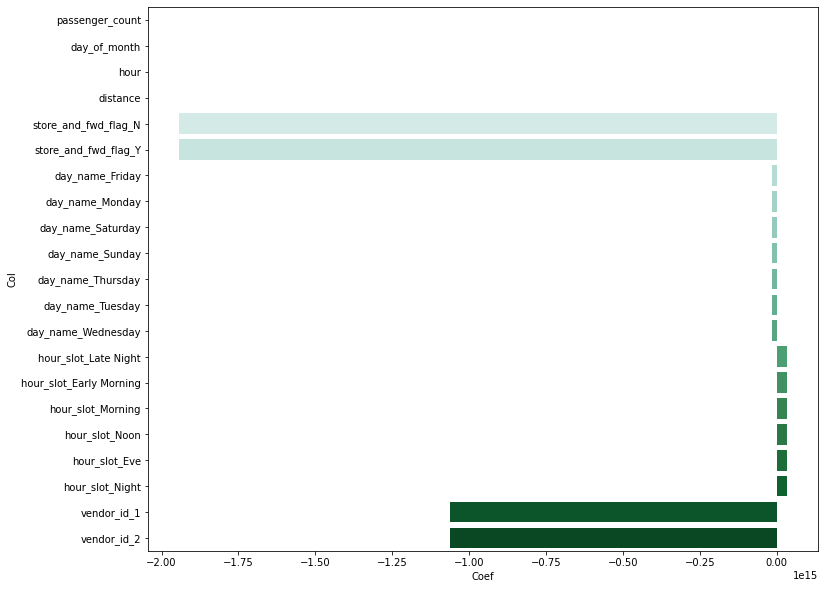

In [15]:
plt.figure(figsize=(12,10))
sns.barplot(x='Coef', y='Col', data=df_coef,palette='BuGn') #color='blue', saturation=.8)

## Checking assumptions of Linear Model

In [16]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : train_y,
    'predicted values' : train_yhat,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
89839,1729,1817.0,-88.0
173249,914,1959.0,-1045.0
342537,810,940.5,-130.5
660985,590,876.5,-286.5
377668,442,984.0,-542.0


### Checking Distribution of Residuals

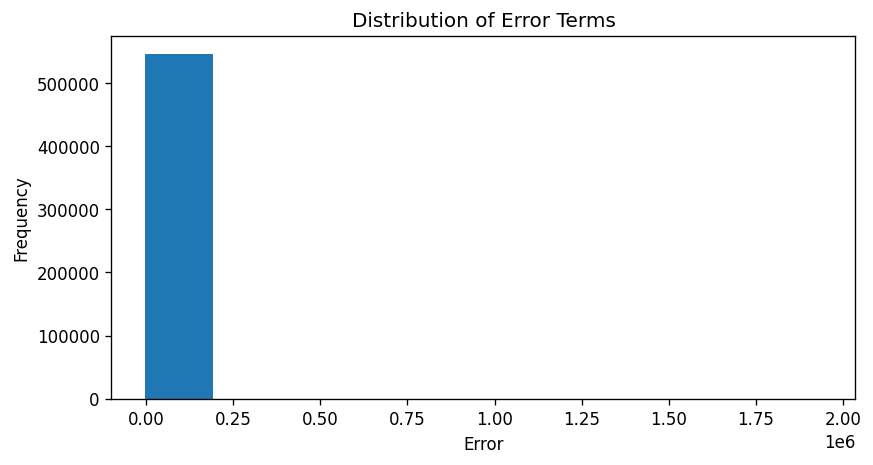

In [17]:
# Histogram for distribution
plt.figure(figsize=(8,4), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals,bins = 10)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

According to the Histogram, the distribution of error s not normal at all.

### QQ-Plot (Is the data Normally Distributed?)

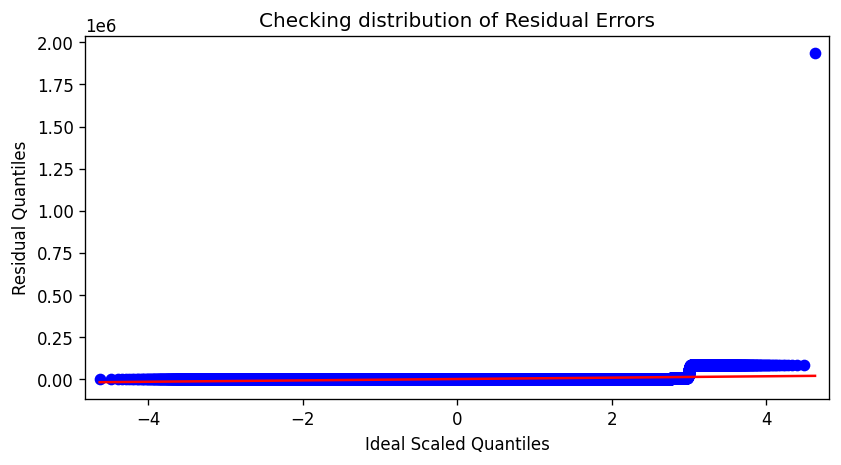

In [18]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(8,4) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

The QQ-plot - the data is not normal in nature.

Lets take a log of the target variable and run again.


## Second run, with log(y)


In [19]:
# Lets take a log of the target and then model the  data 
y_log = np.log(df['trip_duration'])

In [20]:
# Split into train and test data with the log value of y
train_X,test_X,train_y,test_y = model_selection.train_test_split(X,y_log, random_state = 100)

In [21]:
# call the regression model function
test_yhat,test_err,train_yhat,train_err,coef = funcLR(train_X,train_y,test_X,test_y,'mae')

In [22]:
# Calculate error after removing the log effect - 
# Take exopential of the y and predicted values before calculatng the error

print('Test Mean Absolute Error     :', metrics.mean_absolute_error(np.exp(test_y),np.exp(test_yhat)) )
print('Training Mean Absolute Error :', metrics.mean_absolute_error(np.exp(train_y),np.exp(train_yhat)) )

Test Mean Absolute Error     : 378.61930756482155
Training Mean Absolute Error : 393.4135482717925



The MAE has reduced from the first run.


## Checking assumptions of Linear Model

In [23]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : train_y,
    'predicted values' : train_yhat,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']

### Checking Distribution of Residuals

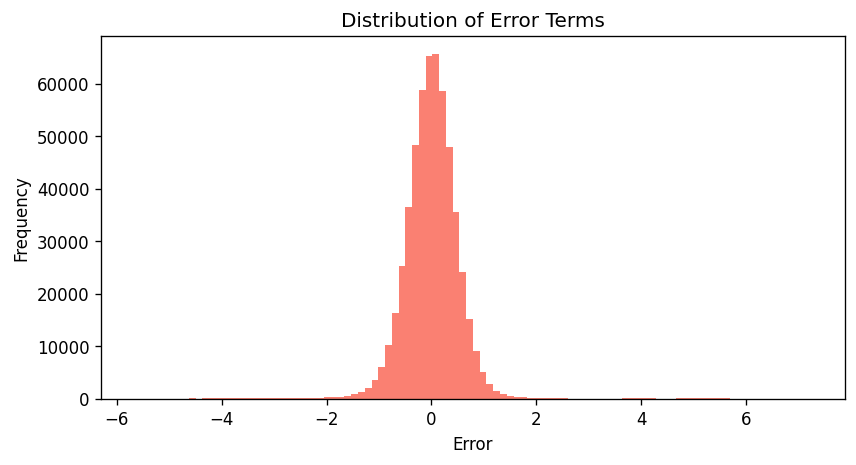

In [24]:
# Histogram for distribution
plt.figure(figsize=(8, 4), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 100 ,color='salmon')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

**According to the Histogram, the distribution of error has outliers on the lower and higher end of the errors,  but seems normal**

### QQ-Plot (Is the data Normally Distributed?)

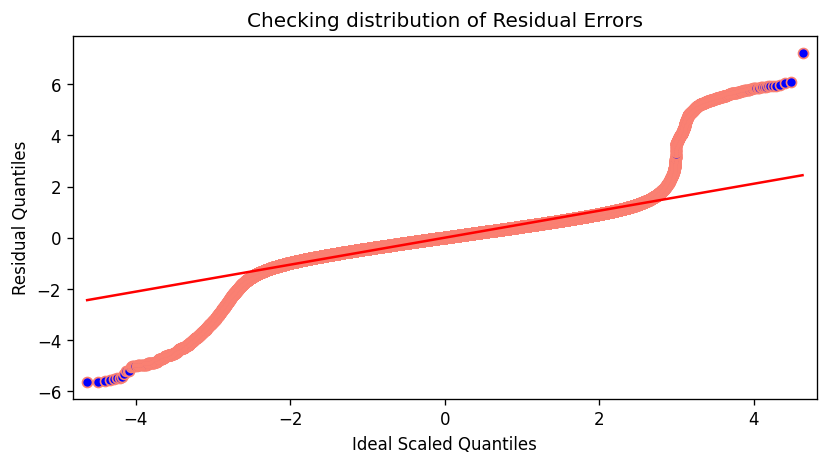

In [25]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(8,4) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax,color='salmon')
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()


The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there are outliers on the lower and higher end of the Residues.

Lets remove some extreme values from the target variable and model the data again.

In [26]:
df['trip_duration'].describe(percentiles=[.1, .25, .5, .75, .9,.95,.99]).round(2)

count     729322.00
mean         952.23
std         3864.63
min            1.00
10%          245.00
25%          397.00
50%          663.00
75%         1075.00
90%         1632.00
95%         2102.00
99%         3429.00
max      1939736.00
Name: trip_duration, dtype: float64

There is exponential  rise in  the value from  min to 10th percentile and 90% percentile to  max

In [27]:
df.shape

(729322, 23)

In [28]:
# Check how many have max value
df[df['trip_duration'] == df['trip_duration'].max()].shape[0]

1

In [29]:
# Check how many have min value - 1 second
df[df['trip_duration'] == df['trip_duration'].min()].shape[0]

13

In [30]:
# Check how many trips are there with less than 1 minute of trip duration
df[df['trip_duration'] <= 60].shape[0]

4362

In [31]:
# There are lot of high values , count the number of rows with trip more than 10 hours
df[df['trip_duration'] >= 10*60*60].shape[0]

978

In [32]:
# Number of trips less than 2 minutes
df[df['trip_duration'] <= 2*60 ].shape[0]

14129

In [33]:
# Lets drop  the max and less than 1 minute rides - potentially wrong entries
orig_rows = df.shape[0]
df = df[df['trip_duration'] != df['trip_duration'].max()]
df = df[df['trip_duration'] > 60]
df.shape

(724959, 23)

In [34]:
# How many rows got droppd
orig_rows - df.shape[0]

4363

In [35]:
df['trip_duration'].describe(percentiles=[.1, .25, .5, .75, .9,.95,.99]).round(2)

count    724959.00
mean        955.12
std        3136.10
min          61.00
10%         251.00
25%         401.00
50%         667.00
75%        1079.00
90%        1636.00
95%        2106.00
99%        3434.42
max       86391.00
Name: trip_duration, dtype: float64

### 3rd run, after removing some of the extreme values from the target variable and taking its log

**Seperate dependent and independent variables**

In [36]:
# Lets take a log of the target and then model the  data 

X = df.drop(['id','trip_duration'], axis=1)
y_log = np.log(df['trip_duration'])
X.shape, y_log.shape

((724959, 21), (724959,))

In [37]:
# Scale the X variable's using MinMax scaler
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X) # returns an array
X = pd.DataFrame(X_scaled, columns = X.columns) # convert back to data frame
X.head()

,passenger_count,day_of_month,hour,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,hour_slot_Late Night,hour_slot_Early Morning,hour_slot_Morning,hour_slot_Noon,hour_slot_Eve,hour_slot_Night,vendor_id_1,vendor_id_2
0,0.111111,0.933333,0.695652,0.230663,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.222222,0.333333,1.000000,0.794308,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.222222,0.666667,0.739130,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.666667,0.133333,0.391304,0.454199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.111111,0.533333,0.260870,0.832671,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
# Split into train and test data with the log value of y
train_X,test_X,train_y,test_y = model_selection.train_test_split(X,y_log, random_state = 100)

In [39]:
# call the regression model function
test_yhat,test_err,train_yhat,train_err,coef = funcLR(train_X,train_y,test_X,test_y,'mae')

In [40]:
# Calculate error after removing the log effect - 
# Take exopential of the y and predicted values before calculatng the error

print('Test Mean Absolute Error     :', metrics.mean_absolute_error(np.exp(test_y),np.exp(test_yhat)) )
print('Training Mean Absolute Error :', metrics.mean_absolute_error(np.exp(train_y),np.exp(train_yhat)) )

Test Mean Absolute Error     : 384.14169752479637
Training Mean Absolute Error : 386.61797236018367


## Checking assumptions of Linear Model

In [41]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : train_y,
    'predicted values' : train_yhat,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']

### Checking Distribution of Residuals

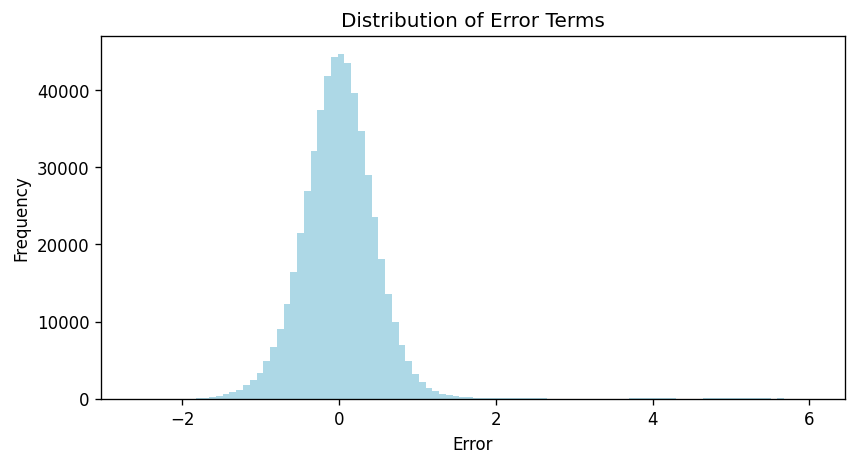

In [42]:
# Histogram for distribution
plt.figure(figsize=(8, 4), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 100 ,color='lightblue')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

**According to the Histogram, the distribution of error has outliers on the lower and higher end of the errors,  but seems normal**

### QQ-Plot (Is the data Normally Distributed?)

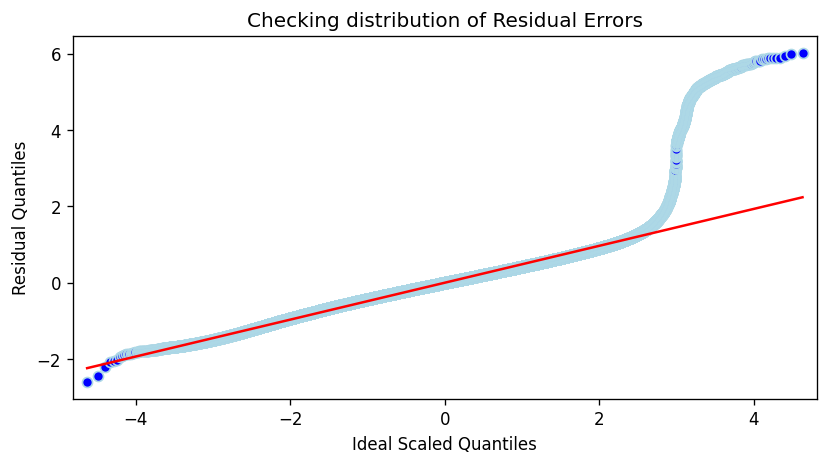

In [43]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(8,4) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax,color='lightblue')
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

The QQ-plot clearly verifies our findings from the the histogram of the residuals, 
the data is mostly normal in nature, but there sre some outliers on the lower and higher end of the Residues.

### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [44]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(train_X.values, i) for i in range(train_X.shape[1])], index =train_X.columns)
VIF

passenger_count            1.090816e+00
day_of_month               1.001939e+00
hour                       3.548577e+01
distance                   1.020183e+00
store_and_fwd_flag_N       1.038041e+06
store_and_fwd_flag_Y       1.329810e+11
day_name_Friday            6.946203e+08
day_name_Monday            2.079938e+07
day_name_Saturday          7.623468e+08
day_name_Sunday            5.046887e+07
day_name_Thursday          1.007831e+10
day_name_Tuesday           5.356672e+06
day_name_Wednesday         3.630323e+09
hour_slot_Late Night       1.830949e+08
hour_slot_Early Morning    1.831502e+10
hour_slot_Morning          1.485911e+06
hour_slot_Noon             5.124459e+07
hour_slot_Eve              2.779552e+07
hour_slot_Night            2.491374e+07
vendor_id_1                5.717884e+06
vendor_id_2                1.437789e+07
dtype: float64

**VIF is more  than  4 - We need to remove day_name_* and vendor_id_* columns and run again**

In [45]:
X.head()

,passenger_count,day_of_month,hour,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,hour_slot_Late Night,hour_slot_Early Morning,hour_slot_Morning,hour_slot_Noon,hour_slot_Eve,hour_slot_Night,vendor_id_1,vendor_id_2
0,0.111111,0.933333,0.695652,0.230663,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.222222,0.333333,1.000000,0.794308,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.222222,0.666667,0.739130,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.666667,0.133333,0.391304,0.454199,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.111111,0.533333,0.260870,0.832671,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
X.filter(like='day_name',axis='columns').columns.values

array(['day_name_Friday', 'day_name_Monday', 'day_name_Saturday',
       'day_name_Sunday', 'day_name_Thursday', 'day_name_Tuesday',
       'day_name_Wednesday'], dtype=object)

In [47]:
X.filter(like='vendor_id',axis='columns').columns.values

array(['vendor_id_1', 'vendor_id_2'], dtype=object)

In [48]:
X = X.drop(X.filter(like='day_name', axis=1).columns.values, axis=1)
X = X.drop(X.filter(like='vendor_id', axis=1).columns.values, axis=1)
X.head()

,passenger_count,day_of_month,hour,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,hour_slot_Late Night,hour_slot_Early Morning,hour_slot_Morning,hour_slot_Noon,hour_slot_Eve,hour_slot_Night
0,0.111111,0.933333,0.695652,0.230663,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.222222,0.333333,1.000000,0.794308,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.222222,0.666667,0.739130,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.666667,0.133333,0.391304,0.454199,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.111111,0.533333,0.260870,0.832671,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
# Split into train and test
train_X,test_X,train_y,test_y = model_selection.train_test_split(X,y_log, random_state = 100)

In [50]:
# call the regression model function
test_yhat,test_err,train_yhat,train_err,coef = funcLR(train_X,train_y,test_X,test_y,'mae')

In [51]:
# train err and test err - 

print('Test Mean Absolute Error     :', metrics.mean_absolute_error(np.exp(test_y),np.exp(test_yhat)) )
print('Training Mean Absolute Error :', metrics.mean_absolute_error(np.exp(train_y),np.exp(train_yhat)) )

Test Mean Absolute Error     : 388.0337117152283
Training Mean Absolute Error : 390.50212542013753


The train and test MAE has increased a bit.

In [52]:
# Create a df of the co-efficients and plot it
df_coef = pd.DataFrame({
    'Col'  : train_X.columns,
    'Coef' : coef
})
df_coef.head()

,Col,Coef
0,passenger_count,6.543370e-02
1,day_of_month,1.690477e-02
2,hour,-9.788712e-02
3,distance,1.860938e+00
4,store_and_fwd_flag_N,-9.625343e+11


<AxesSubplot:xlabel='Coef', ylabel='Col'>

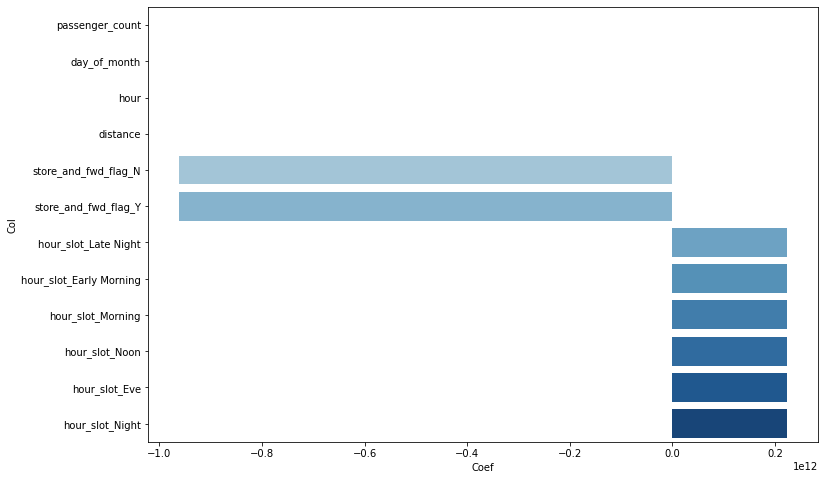

In [53]:
plt.figure(figsize=(12,8))
sns.barplot(x='Coef', y='Col', data=df_coef,palette='Blues') #color='light green',saturation=.4)

In [54]:
# Lets drop the columns with smaller coeffs and model it again
# Drop  coeffs smaller than .5
#sig_var = df_coef[df_coef.Coef.abs() >= 8]
sig_var = df_coef[df_coef.Coef >= 0.005]
sig_var

,Col,Coef
0,passenger_count,6.543370e-02
1,day_of_month,1.690477e-02
3,distance,1.860938e+00
6,hour_slot_Late Night,2.235703e+11
7,hour_slot_Early Morning,2.235703e+11
8,hour_slot_Morning,2.235703e+11
9,hour_slot_Noon,2.235703e+11
10,hour_slot_Eve,2.235703e+11
11,hour_slot_Night,2.235703e+11


In [55]:
# Filter the significant columns
subset = X[sig_var['Col'].values]
subset.head()

,passenger_count,day_of_month,distance,hour_slot_Late Night,hour_slot_Early Morning,hour_slot_Morning,hour_slot_Noon,hour_slot_Eve,hour_slot_Night
0,0.111111,0.933333,0.230663,0.0,0.0,0.0,1.0,0.0,0.0
1,0.222222,0.333333,0.794308,0.0,0.0,0.0,0.0,0.0,1.0
2,0.222222,0.666667,1.000000,0.0,0.0,0.0,0.0,1.0,0.0
3,0.666667,0.133333,0.454199,0.0,0.0,1.0,0.0,0.0,0.0
4,0.111111,0.533333,0.832671,0.0,1.0,0.0,0.0,0.0,0.0


In [56]:
train_X,test_X,train_y,test_y = model_selection.train_test_split(subset,y_log, random_state = 100)

In [57]:
# call the regression model function
test_yhat,test_err,train_yhat,train_err,coef = funcLR(train_X,train_y,test_X,test_y,'mae')

In [58]:
# train err and test err - 
print('Test Mean Absolute Error     :', metrics.mean_absolute_error(np.exp(test_y),np.exp(test_yhat)) )
print('Training Mean Absolute Error :', metrics.mean_absolute_error(np.exp(train_y),np.exp(train_yhat)) )

Test Mean Absolute Error     : 388.0921997449792
Training Mean Absolute Error : 390.56958484692376


MAE almost remains same with less number of columns, so dropped columns were not adding much 

In [59]:
# Create a df of the co-efficients and plot it
df_coef = pd.DataFrame({
    'Col'  : train_X.columns,
    'Coef' : coef
})
df_coef.head()

,Col,Coef
0,passenger_count,6.464441e-02
1,day_of_month,1.689196e-02
2,distance,1.860591e+00
3,hour_slot_Late Night,2.330008e+10
4,hour_slot_Early Morning,2.330008e+10


<AxesSubplot:xlabel='Coef', ylabel='Col'>

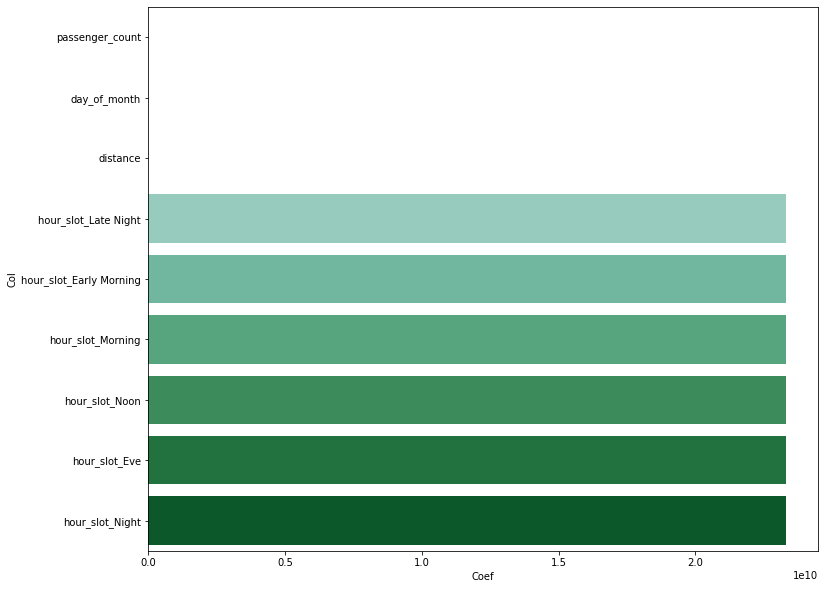

In [60]:
plt.figure(figsize=(12,10))
sns.barplot(x='Coef', y='Col', data=df_coef,palette='BuGn')

## Checking assumptions of Linear Model

In [61]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : train_y,
    'predicted values' : train_yhat,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']

### Plotting residual curve (Is there constant Variance OR Homoscedastic?)

c:\program files\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


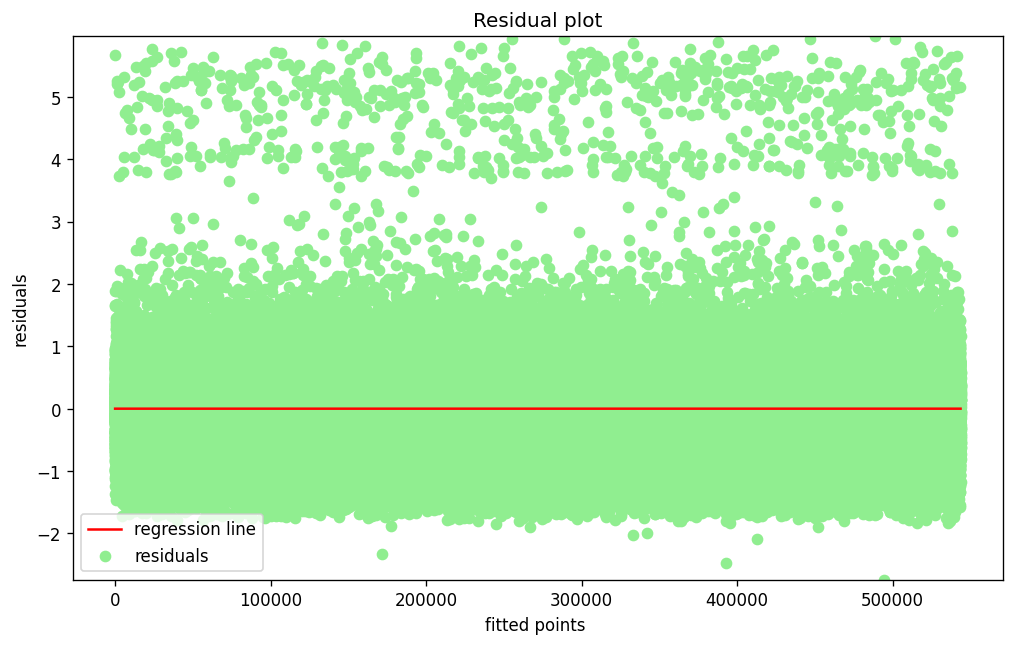

In [62]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,residuals.shape[0])
k = [0 for i in range(0,residuals.shape[0])]
plt.scatter( f, residuals.residuals[:], label = 'residuals',color = 'lightgreen')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(residuals['residuals'].min(), residuals['residuals'].max())
plt.legend();

The Residual plot clearly Looks Homoscedastic, i.e. the the variance of the error across the dataset is nearly constant.

### Checking Distribution of Residuals

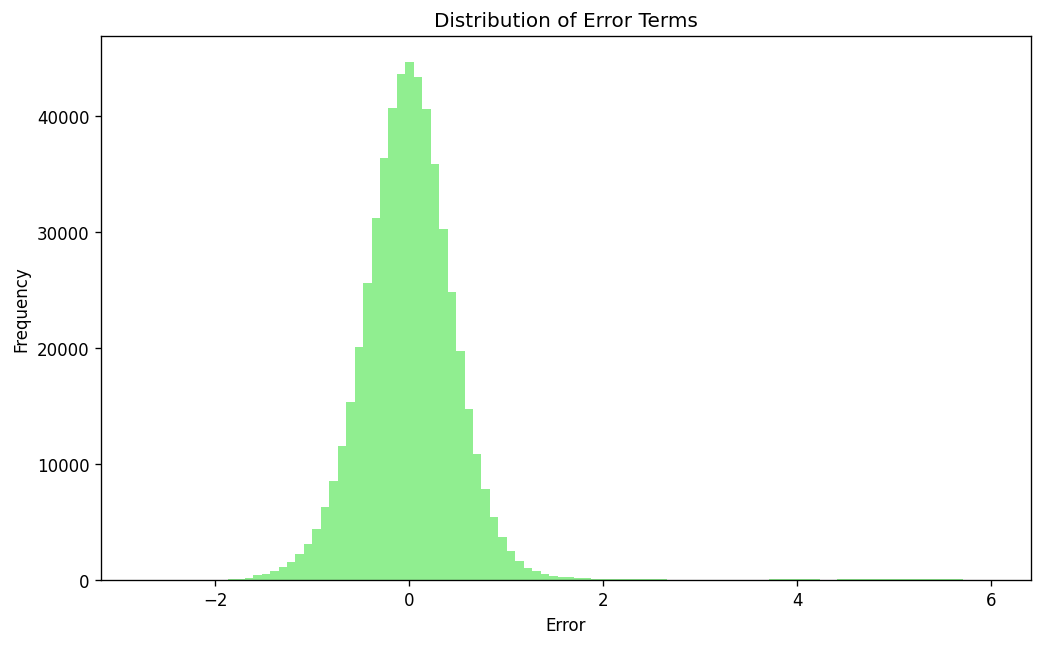

In [63]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals,bins = 100,color = 'lightgreen')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

According to the Histogram, the distribution of error has outliers on the lower and higher end of the errors.

### QQ-Plot (Is the data Normally Distributed?)

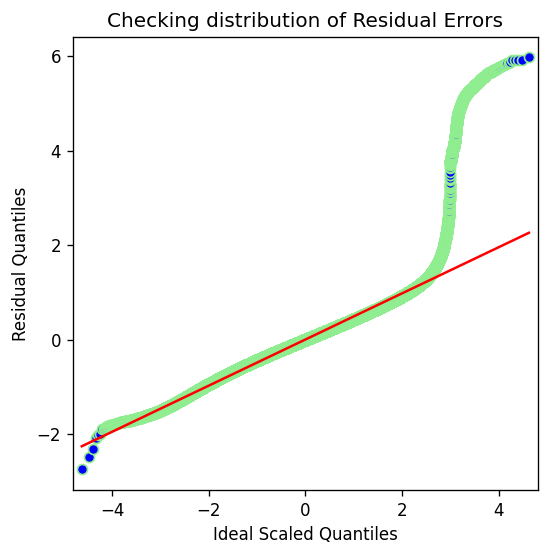

In [64]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax,color = 'lightgreen')
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there sre some outliers on the lower and higher end of the Residues.

### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [65]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(train_X.values, i) for i in range(train_X.shape[1])], index =train_X.columns)
VIF

passenger_count            1.000801
day_of_month               1.000138
distance                   1.018778
hour_slot_Late Night       1.871563
hour_slot_Early Morning    1.798225
hour_slot_Morning          2.217228
hour_slot_Noon             2.291310
hour_slot_Eve              2.590104
hour_slot_Night            2.223962
dtype: float64

**VIF is  less than 4**

**All assumptions for linear regresison is satisfied**

In [66]:
# Lets do k fold cross validation
from sklearn.model_selection import cross_val_score

In [67]:
lr = linear_model.LinearRegression()
cv_scores = -cross_val_score(lr, subset,y_log, scoring='neg_mean_absolute_error', cv=5)
cv_scores  

array([0.35896422, 0.35853068, 0.35967068, 0.35898784, 0.36102016])

In [68]:
cv_scores.mean()

0.3594347166939351

In [69]:
np.exp(cv_scores.mean())

1.4325194063338311

In [70]:
# cannot compare the score with earlier resuts

In [71]:
cv_scores = cross_val_score(lr, subset,y_log, scoring='r2', cv=5)
cv_scores

array([0.58068075, 0.57843136, 0.57567384, 0.57595249, 0.57285712])

In [72]:
cv_scores.mean()

0.5767191118580994

In [73]:
# get all the scoring/errors
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']